# Fig. 6: Computational models used to predict phosphene shape

In [1]:
import os
import numpy as np
import pandas as pd

import argus_shapes
import pulse2percept as p2p

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-08-08 13:45:07,765 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
# If environment variable 'DATA_ROOT' does not exist, data will be automatically downloaded
# from OSF and stored in '../data/argus_shapes':
datafolder = os.environ['DATA_ROOT'] if 'DATA_ROOT' in os.environ else os.path.join('..', 'data')
subjectdata = argus_shapes.load_subjects(os.path.join(datafolder, 'argus_shapes', 'subjects.csv'))

In [3]:
electrodes = ['B7']
X = pd.DataFrame([{'electrode': e} for e in electrodes])

In [4]:
xrange = (-12, 12)
yrange = (-8, 8)
xystep = 0.1
rho = 300
axlambda = 200

In [5]:
scoreboard = argus_shapes.models.ModelA(xrange=xrange, yrange=yrange, xystep=xystep,
                                        rho=rho)
scoreboard.fit(X)
y_score = scoreboard.predict(X)

In [6]:
axonmap = argus_shapes.models.ModelC(xrange=xrange, yrange=yrange, xystep=xystep,
                                     loc_od_x=subjectdata.loc['S4', 'loc_od_x'],
                                     loc_od_y=subjectdata.loc['S4', 'loc_od_y'],
                                     implant_x=subjectdata.loc['S4', 'implant_x'],
                                     implant_y=subjectdata.loc['S4', 'implant_y'],
                                     implant_rot=subjectdata.loc['S4', 'implant_rot'],
                                     rho=rho, axlambda=axlambda)
axonmap.fit(X)
y_axon = axonmap.predict(X)

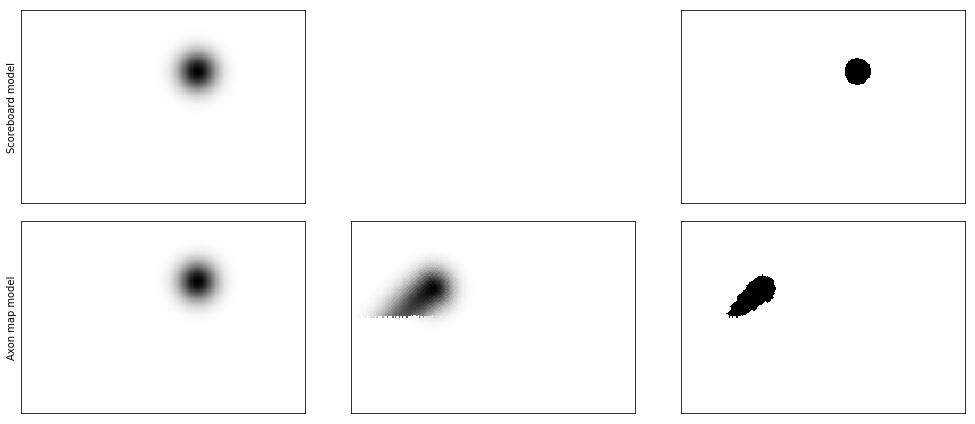

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
axes[0][0].imshow(1 - scoreboard._curr_map[y_score.loc[0, 'electrode']], cmap='gray')
axes[0][0].set_ylabel('Scoreboard model')
axes[0][1].axis('off')
axes[0][2].imshow(1 - y_score.loc[0, 'image'], cmap='gray')

axes[1][0].imshow(1 - scoreboard._curr_map[y_axon.loc[0, 'electrode']], cmap='gray')
axes[1][0].set_ylabel('Axon map model')
axes[1][1].imshow(1 - axonmap._curr_map[y_axon.loc[0, 'electrode']], cmap='gray')
axes[1][2].imshow(1 - y_axon.loc[0, 'image'], cmap='gray')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
fig.savefig('fig6-model-steps.eps')

In [8]:
sim = p2p.Simulation(axonmap.implant_type(x_center=axonmap.implant_x,
                                          y_center=axonmap.implant_y,
                                          rot=axonmap.implant_rot))

Use the following axon map as background for the above panels:

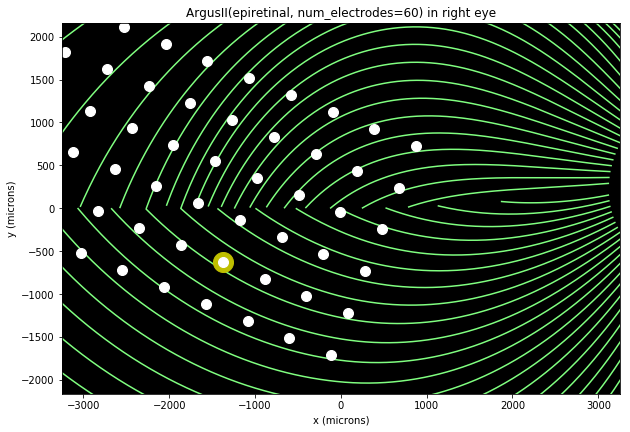

In [9]:
sim.plot_fundus(stim={electrodes[0]: 1}, annotate=False)
plt.xlim(*p2p.retina.dva2ret(axonmap.xrange))
plt.ylim(*p2p.retina.dva2ret(axonmap.yrange))
plt.savefig('fig6-model-steps-jansonius.eps')